# Библиотека numpy

**NumPy** — это библиотека языка Python, добавляющая поддержку больших многомерных массивов и матриц, вместе с большой библиотекой высокоуровневых (и очень быстрых) математических функций для операций с этими массивами.

Основным объектом NumPy является однородный многомерный массив (в numpy называется numpy.ndarray). Это многомерный массив элементов (обычно чисел), одного типа.

Наиболее важные атрибуты объектов ndarray:

**ndarray.ndim** - число измерений (чаще их называют "оси") массива.

**ndarray.shape** - размеры массива, его форма. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из n строк и m столбов, shape будет (n,m). Число элементов кортежа shape равно ndim.

**ndarray.size** - количество элементов массива. Очевидно, равно произведению всех элементов атрибута shape.

**ndarray.dtype** - объект, описывающий тип элементов массива. Можно определить dtype, используя стандартные типы данных Python. NumPy здесь предоставляет целый букет возможностей, как встроенных, например: bool_, character, int8, int16, int32, int64, float8, float16, float32, float64, complex64, object_, так и возможность определить собственные типы данных, в том числе и составные.

**ndarray.itemsize** - размер каждого элемента массива в байтах.

# Создание массивов

В NumPy существует много способов создать массив. Один из наиболее простых - создать массив из обычных списков или кортежей Python, используя функцию numpy.array() (запомните: array - функция, создающая объект типа ndarray):

In [1]:
import numpy as np

a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [2]:
type(a)

numpy.ndarray

Функция array() трансформирует вложенные последовательности в многомерные массивы. Тип элементов массива зависит от типа элементов исходной последовательности (но можно и переопределить его в момент создания).

In [3]:
b = np.array([[1.5, 2, 3], [4, 5, 6]])
b

array([[1.5, 2. , 3. ],
       [4. , 5. , 6. ]])

Можно также переопределить тип в момент создания:

In [4]:
b = np.array([[1.5, 2, 3], [4, 5, 6]], dtype=np.complex)
b

C:\Users\Dmitr\AppData\Local\Temp\ipykernel_9484\2311286893.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b = np.array([[1.5, 2, 3], [4, 5, 6]], dtype=np.complex)


array([[1.5+0.j, 2. +0.j, 3. +0.j],
       [4. +0.j, 5. +0.j, 6. +0.j]])

Функция array() не единственная функция для создания массивов. Обычно элементы массива вначале неизвестны, а массив, в котором они будут храниться, уже нужен. Поэтому имеется несколько функций для того, чтобы создавать массивы с каким-то исходным содержимым (по умолчанию тип создаваемого массива — float64).

Функция zeros() создает массив из нулей, а функция ones() — массив из единиц. Обе функции принимают кортеж с размерами, и аргумент dtype:

In [5]:
a = np.zeros((3, 5))
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [6]:
a = np.ones((2, 2, 2))
a

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

Функция eye() создаёт единичную матрицу (двумерный массив)

In [7]:
a = np.eye(5)
a

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Функция empty() создает массив без его заполнения. Исходное содержимое случайно и зависит от состояния памяти на момент создания массива (то есть от того мусора, что в ней хранится):

In [8]:
a = np.empty((3, 3))
a

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 7.35169681e-321],
       [1.30290542e-311, 1.30290542e-311, 0.00000000e+000]])

Для создания последовательностей чисел, в NumPy имеется функция arange(), аналогичная встроенной в Python range(), только вместо списков она возвращает массивы, и принимает не только целые значения:

In [9]:
a = np.arange(10, 30, 5)
a

array([10, 15, 20, 25])

In [10]:
a = np.arange(0, 1, 0.1)
a

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Вообще, при использовании arange() с аргументами типа float, сложно быть уверенным в том, сколько элементов будет получено (из-за ограничения точности чисел с плавающей запятой). Поэтому, в таких случаях обычно лучше использовать функцию linspace(), которая вместо шага в качестве одного из аргументов принимает число, равное количеству нужных элементов:

In [11]:
a = np.linspace(0, 2, 9)  # 9 чисел от 0 до 2 включительно
a

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

# Изменение формы массивов

Предположим, у нас имеется массив, состоящий из десяти чисел: 

In [12]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Для изменения формы этого массива, достаточно указать свойству shape кортеж с новыми размерами, например, так: 

In [13]:
a.shape = 2, 5
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

В результате изменится представление массива, на которое ссылается переменная a. Если же требуется создать новое представление массива, сохранив прежнее, то следует воспользоваться методом reshape(): 

b = a.reshape(10)
b

Cсылки b и a будут использовать одни и те же данные, то есть, изменение массива через b: 

In [14]:
b[0] = -1 # приведет к изменению соответствующего элемента массива a: 

У свойства shape и метода reshape() размерность должна охватывать все элементы массива. Например, вот такая команда: 

In [15]:
a.shape = 3, 3

ValueError: cannot reshape array of size 10 into shape (3,3)

приведет к ошибке, т.к. размерность 3x3 = 9 элементов, а в массиве 10 элементов. Здесь всегда должно выполняться равенство:

n1 x n2 x … x nN = число элементов массива 

Но допускается делать так: 

In [16]:
a.shape = -1, 2
a

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

Отрицательное значение -1 означает автоматическое вычисление размерности по первой оси. По второй берется значение 2. В этом случае получим размерность 5x2.

То же самое можно делать и в методе reshape(): 

In [17]:
b.reshape(-1, 1)
print(b)
b.reshape(1, -1)
print(b)

[[-1.+0.j -1.+0.j -1.+0.j]
 [ 4.+0.j  5.+0.j  6.+0.j]]
[[-1.+0.j -1.+0.j -1.+0.j]
 [ 4.+0.j  5.+0.j  6.+0.j]]


Используя отрицательный индекс, можно делать и такие преобразования: 

In [18]:
b.reshape(2, -1)
print(b)
b.reshape(-1, 2)
print(b)

[[-1.+0.j -1.+0.j -1.+0.j]
 [ 4.+0.j  5.+0.j  6.+0.j]]
[[-1.+0.j -1.+0.j -1.+0.j]
 [ 4.+0.j  5.+0.j  6.+0.j]]


Если нам требуется многомерный массив преобразовать в обычный одномерный, то можно воспользоваться методом ravel(), который возвращает новое представление, не меняя текущего: 

In [19]:
c = b.ravel() # с ссылается на одномерное представление массива
c

array([-1.+0.j, -1.+0.j, -1.+0.j,  4.+0.j,  5.+0.j,  6.+0.j])

Если же нам нужно текущий массив преобразовать в одномерный, то это можно сделать так: 

In [20]:
b.shape = -1

Помимо свойства shape можно использовать метод resize, который выполняет подобную операцию с текущим массивом. Например: 

In [21]:
a.resize(2, 5) # массив 2x5

Но, как мы уже говорили, вот такая строчка приведет к ошибке: 

In [22]:
a.resize(3, 3)  # ошибка: 3x3 != 10

ValueError: cannot resize an array that references or is referenced
by another array in this way.
Use the np.resize function or refcheck=False

# Транспонирование матриц и векторов

Очень часто в математических операциях требуется выполнять транспонирование матриц и векторов, то есть, заменять строки на столбцы. Например, если имеется матрица (двумерный массив): 

In [23]:
a = np.array([(1, 2, 3), (1, 4, 9), (1, 8, 27)])
a

array([[ 1,  2,  3],
       [ 1,  4,  9],
       [ 1,  8, 27]])

то операция транспонирования может быть реализована так: 

In [24]:
b = a.T
b

array([[ 1,  1,  1],
       [ 2,  4,  8],
       [ 3,  9, 27]])

Обратите внимание, мы здесь создаем лишь новое представление тех же самых данных массива a. И изменение элементов в массиве b: 

In [25]:
b[0, 1] = 10

приведет к соответствующему изменению значения элемента и массива a. Это следует помнить, используя операцию транспонирования.

Транспонирование векторов работает несколько иначе. Предположим, имеется одномерный массив: 

In [26]:
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

и мы выполняем операцию транспонирования: 

In [27]:
x.T
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

В результате ничего не изменилось: вектор как был строкой, так строкой и остался. Почему? Дело в том, что массив x имеет только одну размерность, поэтому здесь нет понятия строк и столбцов. Соответственно, операция транспонирования ни к чему не приводит. Чтобы получить ожидаемый эффект, нужно добавить к массиву еще одну ось, например, так: 

In [28]:
x.shape = 1, -1

И теперь, при транспонировании получим вектор-столбец: 

In [29]:
print(x.T)
print(x)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[1 2 3 4 5 6 7 8 9]]


# Операции с индексами

Оперативная память компьютера линейна, и поэтому даже многомерные массивы, на самом деле являются некоторыми линейными структурами, над которыми существуют система индексов, говорящих как именно читать этот линейный блок. Проведение операций над индексами в большистве случаев эффективно и поэтому операции смены размерности массива или транспонирования выполняются быстро

In [30]:
import numpy as np

a = np.asarray([[1,2], [3,4]])
b = a.T # Транспонированый массив
print(b)

[[1 3]
 [2 4]]


In [31]:
b[0,0] = 10
print(b)

[[10  3]
 [ 2  4]]


In [32]:
print(a)

[[10  2]
 [ 3  4]]


In [33]:
b[0][0] = 11
b

array([[11,  3],
       [ 2,  4]])

Как мы видим при изменени переменной b изменилась переменная a. Это произошло потому, что обе эти переменные использубют один и тот же кусок памяти, но по разному.

# Добавление и удаление осей

Часто при работе с массивами NumPy требуется добавлять новые оси измерений и удалять существующие. Есть множество способов выполнять эти операции, но мы рассмотрим два наиболее распространенных с помощью функций:

    np.expand_dims(a, axis) – добавление новой оси;
    np.squeeze(a[, axis]) – удаление оси (без удаления элементов). 

Давайте предположим, что у нас имеется некий многомерный массив: 

In [34]:
x_test = np.arange(32).reshape(8, 2, 2) # массив 8x2x2

И нам потребовалось добавить еще одно измерение (ось), причем, в самое начало, то есть, ось axis0. Сейчас на этой оси 8 элементов – матриц 2x2, но мы хотим сделать четырехмерный массив, сохранив остальные три оси и их данные без изменений. Как раз это достаточно просто сделать с помощью функции expand_dims, следующим образом: 

In [35]:
x_test4 = np.expand_dims(x_test, axis=0)

Обращаясь к свойству shape: 

x_test4.shape

Видим, что массив стал четырехмерным и первая добавленная ось axis0 содержит один элемент – трехмерный массив 8x2x2. При необходимости, мы всегда можем добавить новый элемент на эту ось: 

In [36]:
a = np.append(x_test4, x_test4, axis=0) # размерность (2, 8, 2, 2)
a

array([[[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19]],

        [[20, 21],
         [22, 23]],

        [[24, 25],
         [26, 27]],

        [[28, 29],
         [30, 31]]],


       [[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19]],

        [[20, 21],
         [22, 23]],

        [[24, 25],
         [26, 27]],

        [[28, 29],
         [30, 31]]]])

или удалить ненужные элементы: 

In [37]:
b = np.delete(a, 0, axis=0) # размерность (1, 8, 2, 2)
b

array([[[[ 0,  1],
         [ 2,  3]],

        [[ 4,  5],
         [ 6,  7]],

        [[ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15]],

        [[16, 17],
         [18, 19]],

        [[20, 21],
         [22, 23]],

        [[24, 25],
         [26, 27]],

        [[28, 29],
         [30, 31]]]])

Здесь второй параметр 0 – индекс удаляемого элемента на оси axis0.

Если нам нужно добавить последнюю ось в массиве, то для этого можно записать такую команду: 

In [38]:
b = np.expand_dims(x_test4, axis=-1) # размерность (1, 8, 2, 2, 1)

Отрицательный индекс -1 – это следующая с конца ось. Если указать индекс -2, то добавится предпоследняя ось и так далее. Отрицательные индексы очень удобно использовать при работе с массивами произвольных размерностей.

Следующая функция squeeze позволяет удалить все оси с одним элементом. Например, строчка: 

In [39]:
c = np.squeeze(b) # размерность (8, 2, 2)
c

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15]],

       [[16, 17],
        [18, 19]],

       [[20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27]],

       [[28, 29],
        [30, 31]]])

превращает массив размерностью (1, 8, 2, 2) в массив размерностью (8, 2, 2). При необходимости, дополнительно мы можем самостоятельно указать оси, которые следует удалять, например, так: 

In [40]:
c = np.squeeze(b, axis=0) # удалит только ось axis0, не затронув другие

Но, если указать ось с числом элементов больше 1, то возникнет ошибка: 

In [41]:
c = np.squeeze(b, axis=1) # ошибка, на оси axis1 8 элементов

ValueError: cannot select an axis to squeeze out which has size not equal to one

В NumPy добавлять новые оси иногда удобнее с помощью специального объекта np.newaxis. Например, пусть у нас есть одномерный массив: 

In [42]:
a = np.arange(1, 10)
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

У него одна ось – одно измерение. Добавим еще одну ось, допустим, в начало. С помощью объекта np.newaxis это можно сделать так: 

In [43]:
b = a[np.newaxis, :] # добавление оси axis0
print(b)
b.shape # (1, 9)

[[1 2 3 4 5 6 7 8 9]]


(1, 9)

Или, можно прописать сразу две оси: 

In [44]:
c = a[np.newaxis, :, np.newaxis]
print(c)
c.shape # (1, 9, 1)

[[[1]
  [2]
  [3]
  [4]
  [5]
  [6]
  [7]
  [8]
  [9]]]


(1, 9, 1)

# Базовые математические операции над массивами

Предположим, имеется обычный список и массив, созданный на его основе:

In [45]:
lst = [1, 2, 3]
a = np.array([1, 2, 3])

Сейчас вы увидите принципиальную разницу между двумя этими объектами. Умножим их на число 2: 

In [46]:
lst*2
a*2

array([2, 4, 6])

Видите, при умножении списка языка Python, он дублируется дважды, а при умножении на NumPy массив – каждый его элемент умножается математически на число 2. Если бы мы захотели то же самое реализовать непосредственно на Python, оперируя списками, то пришлось бы делать что-то вроде:

In [47]:
[x*2 for x in lst]

[2, 4, 6]

Но выполнялась бы такая конструкция дольше, чем в случае с массивом NumPy. Именно благодаря удобству и скорости библиотека NumPy и приобрела свою популярность.

Пусть у нас задан тот же одномерный массив: 

In [48]:
a = np.array([1, 2, 3])

Все указанные в таблице операции выполняются следующим образом: 

In [49]:
print(-a) # унарный минус
print(a + 2) # сложение с числом
print(2 + a)  # так тоже можно записывать
print(a - 3) # вычитание с числом
print(a * 5) # умножение на число
print(a / 5)  # деление на число
print(a // 2)  # целочисленное деление
print(a ** 3)  # возведение в степень 3
print(a % 2)  # вычисление по модулю 2

[-1 -2 -3]
[3 4 5]
[3 4 5]
[-2 -1  0]
[ 5 10 15]
[0.2 0.4 0.6]
[0 1 1]
[ 1  8 27]
[1 0 1]


Приоритеты этих операций такие же, что и при обычных математических вычислениях. А на выходе мы получаем новый массив с соответствующими значениями.

Давайте теперь добавим еще один массив: 

In [50]:
b = np.array([3, 4, 5])

и посмотрим на эти же операции, но с участием двух массивов:

In [51]:
print(a - b)
print(b + a)
print(a * b)
print(b / a)
print(b // a)
print(b ** a)
print(b % a)

[-2 -2 -2]
[4 6 8]
[ 3  8 15]
[3.         2.         1.66666667]
[3 2 1]
[  3  16 125]
[0 0 2]


Везде мы видим поэлементные операции. Соответственно, чтобы они выполнялись, массивы должны быть согласованы по длине. Например, если взять массив: 

In [52]:
b = np.array([3, 4, 5, 6])

и выполнить операцию: 

In [53]:
a + b  # ошибка: длины массивов не совпадают

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

то возникнет ошибка из-за несовпадения длин массивов. Но вот такая операция с двумерным массивом b сработает: 

In [54]:
b = np.arange(1, 7)
b.resize(2, 3)
a + b

array([[2, 4, 6],
       [5, 7, 9]])

В этом случае массив a будет применен к каждой строке массива b. Такое поведение получило название транслирование массивов.

Все рассмотренные операции можно распространить и на многомерные массивы, главное, чтобы они были согласованы по размерам. Я приведу два небольших примера, так как думаю, общий принцип здесь понятен. Пусть у нас трехмерный и двумерный массивы: 

In [55]:
a = np.arange(1, 19)
a.resize(3, 3, 2)
b = np.ones((3, 2))

С ними можно выполнять такие операции:

In [56]:
print(a - b)
print(a * 10)
print(a // b)

[[[ 0.  1.]
  [ 2.  3.]
  [ 4.  5.]]

 [[ 6.  7.]
  [ 8.  9.]
  [10. 11.]]

 [[12. 13.]
  [14. 15.]
  [16. 17.]]]
[[[ 10  20]
  [ 30  40]
  [ 50  60]]

 [[ 70  80]
  [ 90 100]
  [110 120]]

 [[130 140]
  [150 160]
  [170 180]]]
[[[ 1.  2.]
  [ 3.  4.]
  [ 5.  6.]]

 [[ 7.  8.]
  [ 9. 10.]
  [11. 12.]]

 [[13. 14.]
  [15. 16.]
  [17. 18.]]]


Если нам нужно произвести какие-либо математические операции с массивом и изменения сохранить в нем же, то удобно использовать сокращенные записи.

In [57]:
a = np.array([1, 2, 6, 8])
a += 5
b = np.ones(4)
b *= a

# Элементы линейной алгебры

**Упражнение 1**

Создайте два вектора.

Найдите в документации numpy функции **dot** и **inner** вычислите скалярное произведение векторов.

In [60]:
a = np.array([1, 2, 3])
b = np.array([-1, -2, -3])

print(np.dot(a, b))
print(np.inner(a, b))

-14
-14


**Упражнение 2**

Создайте две матрицы (двумерных массива).

Найдите в документации numpy функции **dot** и **matmul** и с помощью этих функций вычислите произведение двух матриц.

Создайте диагональную единичную матрицу и выполните умножение одной из предыдущих матриц на единичную матрицу.

In [62]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[0, 6, 1], [4, 3, 6], [7, 1, 2]])

print(np.dot(a, b))
print(np.matmul(a, b))

E = np.eye(3)
print(E)

print(np.dot(a, E))
print(np.matmul(a, E))

[[29 15 19]
 [62 45 46]
 [95 75 73]]
[[29 15 19]
 [62 45 46]
 [95 75 73]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


Вычисление нормы вектора:

In [58]:
b = np.array([0, 2, 3, 4, 5, 7])
d = np.linalg.norm(b)
d

10.14889156509222

**Упражнение 3**

Вычислите норму матрицы с помощью функции **np.linalg.norm**.

In [66]:
a = np.arange(0, 9, 1)
a.shape = 3, 3

d = np.linalg.norm(a)

print(d)

14.2828568570857


**Упражнение 4**

Вычислите косинус угла между векторами: $\normalsize cos\alpha = \frac{a*b}{\|a\|*\|b\|}$

In [68]:
a = np.array([1, 2, 3])
b = np.array([3, 6, 9])

c = np.dot(a, b)/(np.linalg.norm(a) * np.linalg.norm(b))

print(c)

1.0


____________________________________________________________________________________________________________________
Вычисление определителя матрицы:

In [69]:
A = np.matrix('-4 -1 2; 10 4 -1; 8 3 1') # еще один способ для создания матрицы
print(A)
d = np.linalg.det(A)
print(d)

[[-4 -1  2]
 [10  4 -1]
 [ 8  3  1]]
-14.000000000000009


**Упражнение 5**

Транспонируйте матрицу, вычислите определитель. Отличается ли определитель транспонированной матрицы от определителя исходной матрицы?

Замените одну из строк матрицы на строку из нулей, вычислите определитель матрицы.

Создайте матрицу, у которой две строки переставлены местами по сравнению с исходной матрицей, вычислите определитель новой матрицы.

Создайте матрицу с двумя одинаковыми строками, вычислите ее определитель.

Умножьте одну из строк исходной матрицы на число, вычислите определитель.

Прибавьте к элементам одной строки прибавить элементы другой строки, умноженные на одно и тоже число, вычтслите определитель.

In [78]:
A = np.matrix('-4 -1 2; 10 4 -1; 8 3 1')
print(A)
d = np.linalg.det(A)
print(d)

[[-4 -1  2]
 [10  4 -1]
 [ 8  3  1]]
-14.000000000000009


In [79]:
B = A.T
print(B)
print(np.linalg.det(A))

[[-4 10  8]
 [-1  4  3]
 [ 2 -1  1]]
-14.000000000000009


In [80]:
B = A.copy()
B[0, :] = [0, 0, 0]
print(B)
print(np.linalg.det(B))

[[ 0  0  0]
 [10  4 -1]
 [ 8  3  1]]
0.0


In [81]:
B = A.copy()
B[0, :] = A[1, :]
B[1, :] = A[0, :]
print(B)
print(np.linalg.det(B))

[[10  4 -1]
 [-4 -1  2]
 [ 8  3  1]]
14.000000000000009


In [82]:
B = A.copy()
B[0, :] = B[1, :]
print(B)
print(np.linalg.det(B))

[[10  4 -1]
 [10  4 -1]
 [ 8  3  1]]
0.0


In [84]:
B = A.copy()
B[0, :] = 2 * B[0, :]
print(B)
print(np.linalg.det(B))

[[-8 -2  4]
 [10  4 -1]
 [ 8  3  1]]
-28.00000000000002



# Построение графиков в matplotlib

Построение графика по точкам:

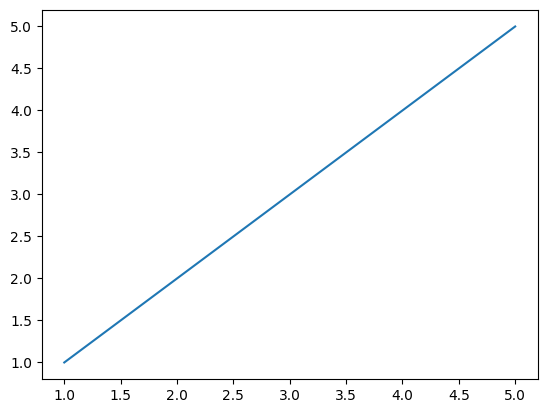

In [85]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])
plt.show()

Для начала построим линейную зависимость, дадим нашему графику название, подпишем оси и отобразим сетку:

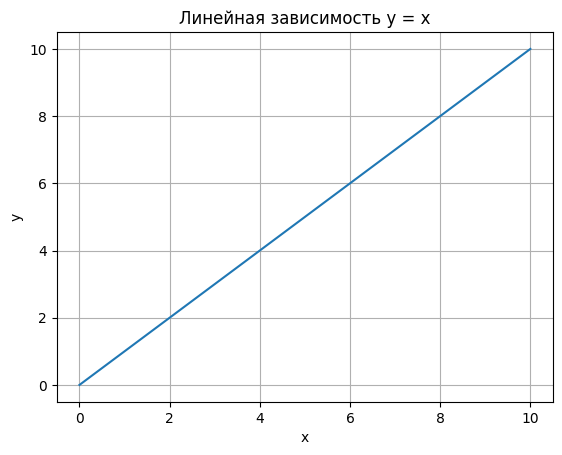

In [86]:
import numpy as np
# Независимая (x) и зависимая (y) переменные
x = np.linspace(0, 10, 50)
y = x

# Построение графика
plt.title("Линейная зависимость y = x") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(x, y)  # построение графика

Изменим тип линии и ее цвет, для этого в функцию plot(), в качестве третьего параметра передадим строку, сформированную определенным образом, в нашем случае это “r–”, где “r” означает красный цвет, а “–” – тип линии – пунктирная линия.

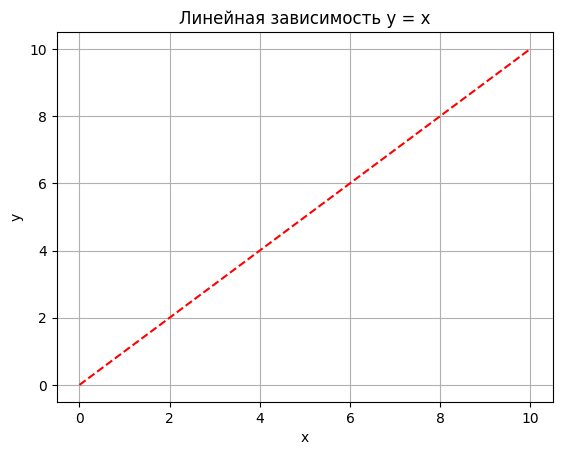

In [87]:
# Построение графика
plt.title("Линейная зависимость y = x") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(x, y, "r--")  # построение графика

**Несколько графиков на одном поле**

Построим несколько графиков на одном поле, для этого добавим квадратичную зависимость:

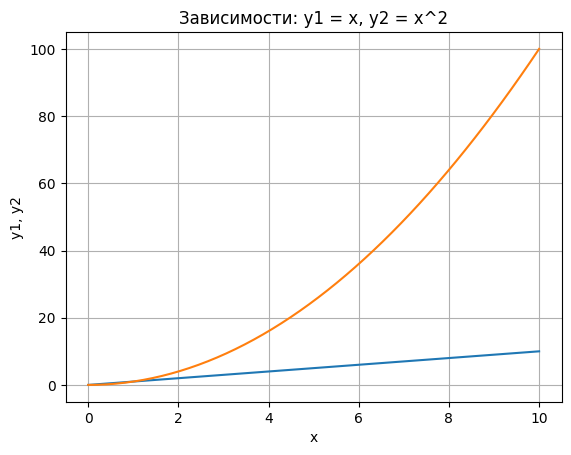

In [88]:
# Линейная зависимость
x = np.linspace(0, 10, 50)
y1 = x
# Квадратичная зависимость
y2 = [i**2 for i in x]
# Построение графика
plt.title("Зависимости: y1 = x, y2 = x^2") # заголовок
plt.xlabel("x")         # ось абсцисс
plt.ylabel("y1, y2")    # ось ординат
plt.grid()              # включение отображение сетки
plt.plot(x, y1, x, y2)  # построение графика

В приведенном примере в функцию plot() последовательно передаются два массива для построения первого графика и два массива для построения второго, при этом, как вы можете заметить, для обоих графиков массив значений независимой переменной x один и то же.

**Несколько разделенных полей с графиками**

Третья, довольно часто встречающаяся задача – это отобразить два или более различных поля, на которых будет отображено по одному или более графику.

Построим уже известные нам две зависимость на разных полях.

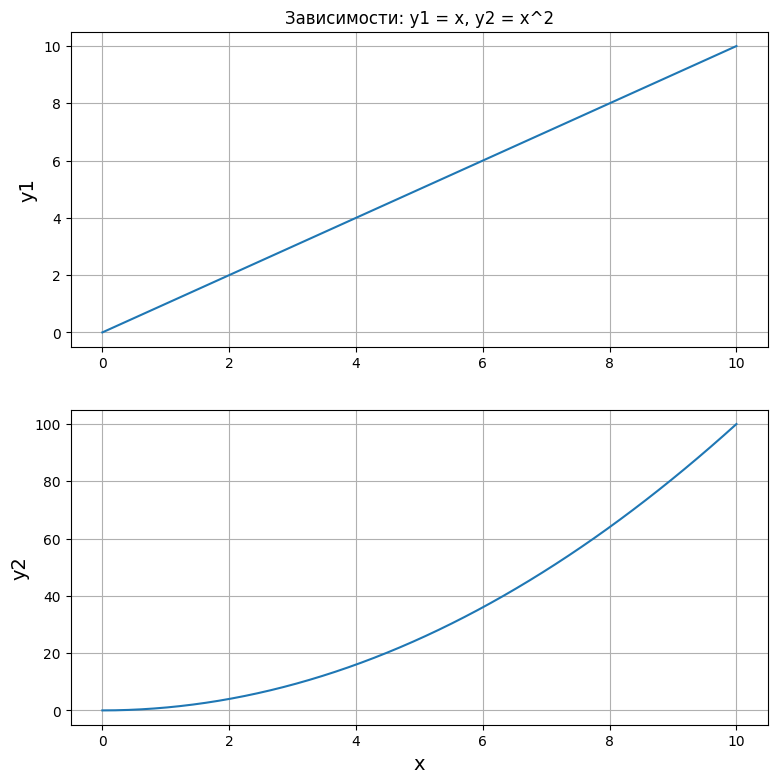

In [89]:
# Линейная зависимость
x = np.linspace(0, 10, 50)
y1 = x
# Квадратичная зависимость
y2 = [i**2 for i in x]
# Построение графиков
plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
plt.plot(x, y1)               # построение графика
plt.title("Зависимости: y1 = x, y2 = x^2") # заголовок
plt.ylabel("y1", fontsize=14) # ось ординат
plt.grid(True)                # включение отображение сетки
plt.subplot(2, 1, 2)
plt.plot(x, y2)               # построение графика
plt.xlabel("x", fontsize=14)  # ось абсцисс
plt.ylabel("y2", fontsize=14) # ось ординат
plt.grid(True)                # включение отображение сетки

Здесь мы воспользовались новыми функциями: 

figure() – функция для задания глобальных параметров отображения графиков. В нее, в качестве аргумента, мы передаем кортеж, определяющий размер общего поля. 

subplot() – функция для задания местоположения поля с графиком. Существует несколько способов задания областей для вывода через функцию subplot() мы воспользовались следующим: первый аргумент – количество строк, второй – столбцов в формируемом поле, третий – индекс (номер поля, считаем сверху вниз, слева направо).

Дополнительно мы использовали параметр fontsize для функций xlabel() и ylabel(), для задания размера шрифта.

**Точечная диаграмма (scatter plot)**

x [0.86199091 0.25804598 0.72101063 0.60078768 0.75803719 0.01327087
 0.54518883 0.89955067 0.28832931 0.88350059 0.70719093 0.57491636
 0.98083273 0.81647064 0.48536991 0.28089742 0.33610267 0.35091122
 0.4139879  0.82473322 0.64926432 0.23866001 0.16471391 0.14393343
 0.32521514 0.44071538 0.01850417 0.73584397 0.94455076 0.55821242
 0.08356678 0.48619335 0.28453371 0.16815302 0.43085448 0.92850522
 0.65325702 0.39544057 0.27826213 0.33651839 0.59932208 0.41464529
 0.60696195 0.43142004 0.39210166 0.96983144 0.53960176 0.63692892
 0.62266192 0.70495183]
y [0.15994776 0.43604665 0.25648209 0.41411262 0.33670904 0.90813714
 0.43813403 0.35068679 0.02995452 0.42382075 0.36790264 0.51739855
 0.83780335 0.43576291 0.44920377 0.47301788 0.43638503 0.62842236
 0.20148868 0.97057581 0.00587786 0.09286017 0.27676657 0.42725401
 0.8692744  0.7008585  0.80759065 0.87067399 0.9047183  0.55589286
 0.7982874  0.24161463 0.92743687 0.04635318 0.18572301 0.47799275
 0.28316638 0.08583609 0.24307939 

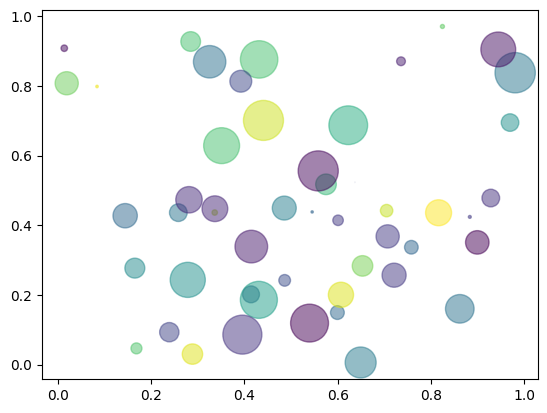

In [90]:
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N) # случайный вектор из 50 элементов
print("x", x)
y = np.random.rand(N) # случайный вектор из 50 элементов
print("y", y)
colors = np.random.rand(N) # случайный вектор из 50 элементов, чтобы задавать цвета каждой из точек
area = (30 * np.random.rand(N))**2 # случайные площади каждой из точек

plt.scatter(x, y, s=area, c=colors, alpha=0.5) # нанесение точек на диаграмму, x и y - координаты
                                               # area - площади точек, colors - цвета точек
                                               # alpha - значение прозрачности точек
plt.show()

**Пример с вычислением числа $\pi$ с помощью метода Монте Карло и визуализация результатов**

Переключим режим отображения графиков в notebook:

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.axes import Axes
from scipy.stats import norm

class PiAnimation:
    def __init__(self, ax: Axes, ax_pi: Axes, ax_gaus: Axes):
        self.inner = 0
        self.out = 0

        self.xi, self.yi = [], []
        self.xo, self.yo = [], []

        ax.set_xlim(-1.0, 1.5)
        ax.set_ylim(-1.0, 1.5)
        ax.axis("off")
        ax.add_artist(plt.Circle((0.0, 0.0), 1, fill=False))
        ax.add_artist(plt.Rectangle((-1, -1), 2, 2, fill=False))

        self.line_i = ax.plot(self.xi, self.yi, "ro")[0]
        self.line_o = ax.plot(self.xo, self.yo, "bo")[0]
        self.text = ax.text(0.3, 1.1, "", fontdict={"fontsize": 32})
        self.text_n = ax.text(-0.9, 1.1, "", fontdict={"fontsize": 32})

        self.ax_pi = ax_pi
        self.pi = []
        self.pi_line = ax_pi.plot([], self.pi,"-")[0]
        ax_pi.set_ylim(0, 2*np.pi)

        self.ax_gaus = ax_gaus
        self.gauss_point = np.linspace(0.5*np.pi, 1.5 * np.pi, 200)
        self.gauss = ax_gaus.plot(self.gauss_point, np.zeros(200), "")[0]

    def __call__(self, n):
        x, y = 2*(np.random.random_sample(2) - 0.5)
        if x ** 2 + y ** 2 <= 1:
            self.inner += 1
            self.xi.append(x)
            self.yi.append(y)
            self.line_i.set_data(self.xi, self.yi)
        else:
            self.out +=1
            self.xo.append(x)
            self.yo.append(y)
            self.line_o.set_data(self.xo, self.yo)
        N = self.inner + self.out
        prob = self.inner/N
        pi = 4*prob
        self.pi.append(pi)
        self.text.set_text(r"$\pi = {:.5}$".format(pi))
        self.text_n.set_text("N = {:5d}   ".format(N))

        self.pi_line.set_data(range(N), self.pi)
        self.ax_pi.relim()
        self.ax_pi.autoscale()

        mean, var = np.mean(self.pi), np.var(self.pi)

        if N > 3:
            self.gauss.set_data(self.gauss_point, norm.pdf(self.gauss_point, loc = mean, scale = var))
            self.ax_gaus.relim()
            self.ax_gaus.autoscale()
        return self.line_i, self.line_o, self.text, self.text_n, self.pi_line, self.gauss

<IPython.core.display.Javascript object>


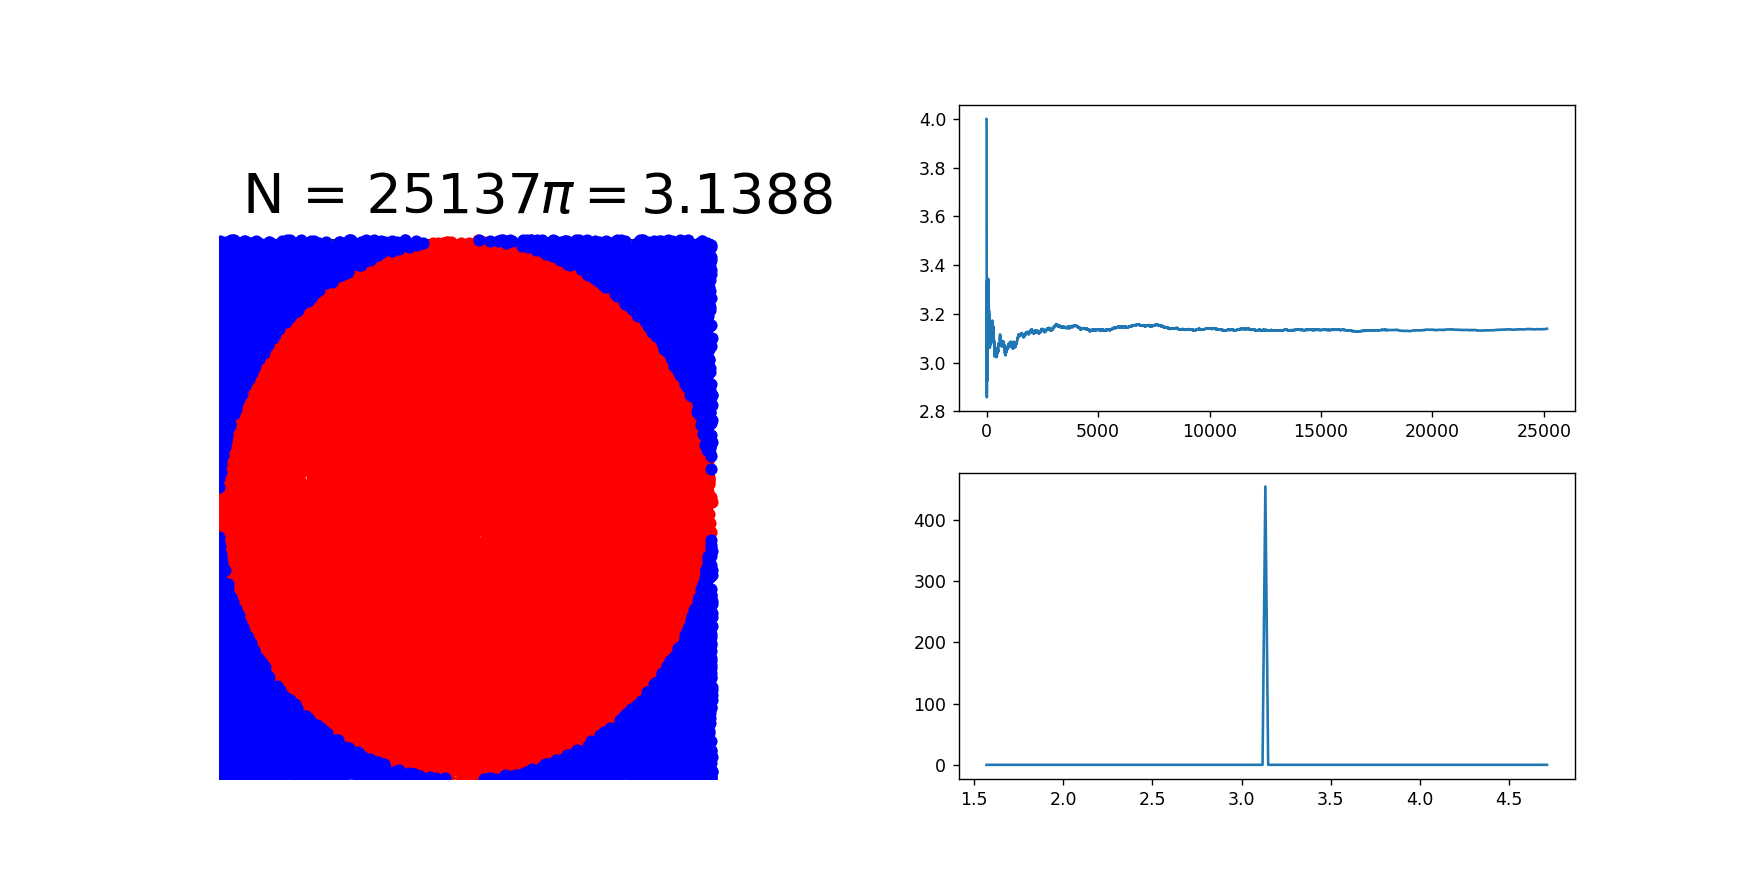

In [3]:
from matplotlib.animation import FuncAnimation


fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(121)
ax2 = plt.subplot(222)
ax3 = plt.subplot(224)
pi_ani = PiAnimation(ax1, ax2, ax3)
anim = FuncAnimation(fig, pi_ani, frames=10_000, interval=50, blit=True)
plt.show()